# Creating a Recommender Engine Pool

In [ ]:
import pandas as pd
import numpy as np
import joblib # joblib==1.2.0, install if needed

In [ ]:
# Mount GDrive folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set home directory
import os
home_dir = "drive/MyDrive/Eskwelabs_C12/Sprint3/"
os.chdir(home_dir)

## 1. Read data

Read charts tracks data

In [ ]:
chart_tracks_df = pd.read_csv('data/pinoy_genres.csv')
chart_tracks_df.head()

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,0.376,0.000000,9,0.1090,-6.100,1,63,0.0457,124.570,0.280
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.262,0.000000,11,0.0669,-15.073,1,0,0.0310,84.007,0.265
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.322,0.029600,6,0.0809,-13.200,1,0,0.0369,155.982,0.511
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.125,0.000005,7,0.3210,-14.847,1,56,0.0383,114.694,0.108
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.669,0.027100,11,0.1110,-8.813,1,28,0.0385,113.010,0.963


Remove tracks with no available/incomplete audio features

In [ ]:
print(len(chart_tracks_df))
chart_tracks_df = chart_tracks_df.dropna()
print(len(chart_tracks_df))

165060
165060


Remove duplicate tracks

In [ ]:
print(len(chart_tracks_df))
chart_tracks_df = chart_tracks_df.drop_duplicates(subset=['artist_id','track_name'])
print(len(chart_tracks_df))

165060
616


## 2. Load model pipeline

In [ ]:
pipeline = joblib.load('genre_classifierS3G3.pkl')
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()), ('rfc', RandomForestClassifier())])

In [ ]:
pipeline.named_steps['rfc']

RandomForestClassifier()

## 3. Predict Track Genres

Define features and genre id lookup dict

In [ ]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [ ]:
genre_lookup = {0: 'opm p-pop', 1: 'opm rap', 2: 'opm rock', 3: 'opm senti'}

Predict genre of each charting track using loaded pipeline

In [ ]:
chart_tracks_df['predicted_genre_id'] = pipeline.predict(chart_tracks_df[feature_cols])
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].map(genre_lookup)
chart_tracks_df

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,predicted_genre_id,predicted_genre
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,9,0.1090,-6.100,1,63,0.0457,124.570,0.280,3,opm senti
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,11,0.0669,-15.073,1,0,0.0310,84.007,0.265,3,opm senti
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,6,0.0809,-13.200,1,0,0.0369,155.982,0.511,3,opm senti
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,7,0.3210,-14.847,1,56,0.0383,114.694,0.108,3,opm senti
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,11,0.1110,-8.813,1,28,0.0385,113.010,0.963,1,opm rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163558,2023-09-27,2BLdelIp46CHvKkyWeqZHL,ERE,80250,170,2023-09-22,7H0mDAUmK6BUuGZCy10kcv,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,7,0.2320,-7.818,1,73,0.0420,146.051,0.257,3,opm senti
164270,2023-10-06,3LvrJEPQ61Vvj1t3Edg20X,Ikaw Pa Rin Ang Pipiliin Ko,74590,196,2021-07-02,6P8VL5hDXBJODIAOBuPJV4,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,9,0.1010,-7.090,1,68,0.0338,173.972,0.345,3,opm senti
164343,2023-10-07,1EP2WyCX9Q7y24bKPSZ0tc,Patutunguhan,82890,176,2023-06-30,6UPgk02gaRFzLqy15dFH3I,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,4,0.2210,-5.740,0,66,0.0777,120.076,0.416,0,opm p-pop
164526,2023-10-09,3uWHNTmc2FFYmxlULgJ03E,Shot Puno,76740,193,2022-10-14,3TnSVVzQ4WsJfdt8bsuqpd,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,7,0.6540,-6.664,1,65,0.0963,139.575,0.471,1,opm rap


In [ ]:
chart_tracks_df['predicted_genre'].value_counts()

opm senti    242
opm rap      155
opm rock     131
opm p-pop     88
Name: predicted_genre, dtype: int64

## 4. Create recommender engine pool with predicted genres and probabilities

Show probabilities for all genres and for the predicted genre

In [ ]:
chart_tracks_df['genre_probabilities']= pipeline.predict_proba(chart_tracks_df[feature_cols]).tolist()
chart_tracks_df['predicted_genre_proba'] = chart_tracks_df['genre_probabilities'].apply(lambda x: max(x))
chart_tracks_df.head()

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,loudness,mode,popularity,speechiness,tempo,valence,predicted_genre_id,predicted_genre,genre_probabilities,predicted_genre_proba
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,-6.100,1,63,0.0457,124.570,0.280,3,opm senti,"[0.19, 0.28, 0.12, 0.41]",0.41
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,-15.073,1,0,0.0310,84.007,0.265,3,opm senti,"[0.18, 0.23, 0.18, 0.41]",0.41
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,-13.200,1,0,0.0369,155.982,0.511,3,opm senti,"[0.15, 0.24, 0.16, 0.45]",0.45
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,-14.847,1,56,0.0383,114.694,0.108,3,opm senti,"[0.12, 0.03, 0.14, 0.71]",0.71
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,-8.813,1,28,0.0385,113.010,0.963,1,opm rap,"[0.3, 0.51, 0.12, 0.07]",0.51


In [ ]:
chart_tracks_df['genre_probabilities'].values[0]

[0.19, 0.28, 0.12, 0.41]

Split genre probabilities to its own columns

In [ ]:
genre_cols = [f'genre_{genre}_proba' for genre in genre_lookup.values()]
chart_tracks_df[genre_cols] = chart_tracks_df['genre_probabilities'].apply(pd.Series)
chart_tracks_df = chart_tracks_df.drop(columns=['genre_probabilities'])#drop column with probability list
chart_tracks_df

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,speechiness,tempo,valence,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_opm p-pop_proba,genre_opm rap_proba,genre_opm rock_proba,genre_opm senti_proba
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,0.0457,124.570,0.280,3,opm senti,0.41,0.19,0.28,0.12,0.41
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.0310,84.007,0.265,3,opm senti,0.41,0.18,0.23,0.18,0.41
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.0369,155.982,0.511,3,opm senti,0.45,0.15,0.24,0.16,0.45
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.0383,114.694,0.108,3,opm senti,0.71,0.12,0.03,0.14,0.71
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.0385,113.010,0.963,1,opm rap,0.51,0.30,0.51,0.12,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163558,2023-09-27,2BLdelIp46CHvKkyWeqZHL,ERE,80250,170,2023-09-22,7H0mDAUmK6BUuGZCy10kcv,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,0.0420,146.051,0.257,3,opm senti,0.51,0.03,0.23,0.23,0.51
164270,2023-10-06,3LvrJEPQ61Vvj1t3Edg20X,Ikaw Pa Rin Ang Pipiliin Ko,74590,196,2021-07-02,6P8VL5hDXBJODIAOBuPJV4,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,0.0338,173.972,0.345,3,opm senti,0.78,0.00,0.05,0.17,0.78
164343,2023-10-07,1EP2WyCX9Q7y24bKPSZ0tc,Patutunguhan,82890,176,2023-06-30,6UPgk02gaRFzLqy15dFH3I,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,0.0777,120.076,0.416,0,opm p-pop,0.44,0.44,0.24,0.25,0.07
164526,2023-10-09,3uWHNTmc2FFYmxlULgJ03E,Shot Puno,76740,193,2022-10-14,3TnSVVzQ4WsJfdt8bsuqpd,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,0.0963,139.575,0.471,1,opm rap,0.49,0.16,0.49,0.21,0.14


In [ ]:
chart_tracks_df.describe()

,streams,position,followers,chart_date_year,chart_date_month,chart_date_day,release_date_year,release_date_month,release_date_day,acousticness,...,popularity,speechiness,tempo,valence,predicted_genre_id,predicted_genre_proba,genre_opm p-pop_proba,genre_opm rap_proba,genre_opm rock_proba,genre_opm senti_proba
count,616.000000,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,...,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,36447.235390,150.017857,2.345745e+06,2019.470779,6.017857,15.045455,2016.514610,6.154221,14.431818,0.446214,...,30.756494,0.061976,117.796799,0.407736,1.855519,0.609497,0.210081,0.222451,0.239221,0.328247
std,25202.823032,48.152988,2.947574e+06,1.931962,3.677398,9.291374,6.812694,3.705928,9.390978,0.293646,...,28.872849,0.071976,28.447098,0.199729,1.094065,0.147834,0.200967,0.252548,0.209666,0.269104
min,11319.000000,1.000000,1.083000e+03,2017.000000,1.000000,1.000000,1980.000000,1.000000,1.000000,0.000031,...,0.000000,0.023200,50.538000,0.049300,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000
25%,22349.750000,117.000000,3.369590e+05,2018.000000,2.000000,7.000000,2016.750000,2.000000,6.000000,0.173750,...,0.000000,0.030875,94.996750,0.256000,1.000000,0.490000,0.070000,0.040000,0.080000,0.080000
50%,28856.000000,168.000000,1.024310e+06,2019.000000,6.000000,15.000000,2018.000000,6.000000,14.000000,0.452500,...,27.000000,0.036800,119.260000,0.376000,2.000000,0.600000,0.140000,0.090000,0.180000,0.240000
75%,39950.750000,190.000000,3.092229e+06,2021.000000,9.000000,24.000000,2020.000000,9.000000,22.000000,0.704250,...,59.000000,0.056275,136.030750,0.532000,3.000000,0.710000,0.290000,0.382500,0.350000,0.590000
max,299896.000000,200.000000,9.756117e+06,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,0.962000,...,83.000000,0.743000,207.924000,0.972000,3.000000,0.980000,0.980000,0.940000,0.960000,0.920000


View histogram of probabilities

<Axes: >

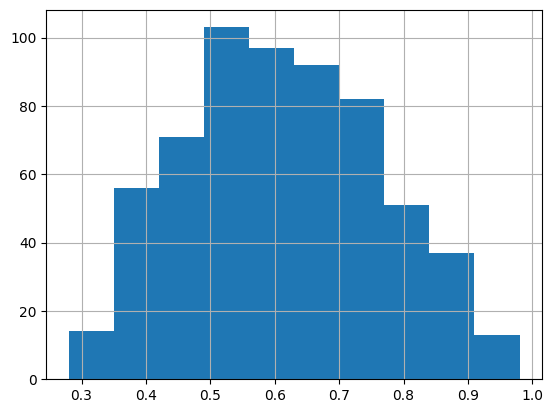

In [ ]:
chart_tracks_df['predicted_genre_proba'].hist()

Check if model correctly predicts the genre of a track in the Top 200 charts.

- User may validate the results

    - subjectively as a listener
    - refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

> Q: Pick a genre and check tracks classified with *highest* predicted genre probability. Does it make sense that the model is confident for this genre prediction?

In [ ]:
#######################
# Write code here
#
chart_tracks_df[chart_tracks_df['predicted_genre']=='opm senti'][['track_name','artist_name','predicted_genre','predicted_genre_proba']]\
            .sort_values(['predicted_genre_proba'],ascending=False)[:10]

########################


,track_name,artist_name,predicted_genre,predicted_genre_proba
65623,Make It With You,Ben&Ben,opm senti,0.92
116108,Tahanan,Adie,opm senti,0.92
156993,Walang Kapalit (AM VER.),Arthur Miguel,opm senti,0.92
138288,Ikaw Pa Rin,mrld,opm senti,0.89
128938,Malaya,Moira Dela Torre,opm senti,0.88
5,Stay - On the Wings of Love Teleserye Theme,Daryl Ong,opm senti,0.88
102722,Paraluman,Adie,opm senti,0.87
39747,Sa Dulo Ng Walang Hanggan - Sa Ngalan Ng Pag-I...,December Avenue,opm senti,0.87
19060,Tagu-Taguan,Moira Dela Torre,opm senti,0.86
30190,Jules,Unique Salonga,opm senti,0.86


> Q: Pick another genre and check tracks classified with *lowest* predicted genre probability. Does it make sense that the model is unsure for this genre prediction?

In [ ]:
#######################
# Write code here
chart_tracks_df[chart_tracks_df['predicted_genre']=='opm senti'][['track_name','artist_name','predicted_genre','predicted_genre_proba']]\
            .sort_values(['predicted_genre_proba'])[:10]

#
########################


,track_name,artist_name,predicted_genre,predicted_genre_proba
120532,Iba (ft. Moira Dela Torre),Zack Tabudlo,opm senti,0.32
110549,lutang,jikamarie,opm senti,0.33
29492,"Closer You and I - From ""Loving in Tandem""",Michael Pangilinan,opm senti,0.34
674,New York And Back,Leanne & Naara,opm senti,0.34
7517,Forever,James Reid,opm senti,0.34
126490,As You Are,Zack Tabudlo,opm senti,0.36
115825,Tanging Dahilan,Belle Mariano,opm senti,0.36
14263,Gitara,Parokya Ni Edgar,opm senti,0.37
112783,Hindi Ko Kaya,Zack Tabudlo,opm senti,0.37
84670,Can't Get Out,Jem Macatuno,opm senti,0.37


## 5. Save recommender engine pool

In [ ]:
# save data
chart_tracks_df.to_csv("data/spotify_daily_charts_tracks_rec_poolS3G3.csv", index=False, encoding='utf-8')

# Create Recommender Engine

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

## 1. Read the recommendation pool

In [ ]:
# read data
rec_pool_df = pd.read_csv("data/spotify_daily_charts_tracks_rec_poolS3G3.csv")
rec_pool_df

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,speechiness,tempo,valence,predicted_genre_id,predicted_genre,predicted_genre_proba,genre_opm p-pop_proba,genre_opm rap_proba,genre_opm rock_proba,genre_opm senti_proba
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,0.0457,124.570,0.280,3,opm senti,0.41,0.19,0.28,0.12,0.41
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.0310,84.007,0.265,3,opm senti,0.41,0.18,0.23,0.18,0.41
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.0369,155.982,0.511,3,opm senti,0.45,0.15,0.24,0.16,0.45
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.0383,114.694,0.108,3,opm senti,0.71,0.12,0.03,0.14,0.71
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.0385,113.010,0.963,1,opm rap,0.51,0.30,0.51,0.12,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2023-09-27,2BLdelIp46CHvKkyWeqZHL,ERE,80250,170,2023-09-22,7H0mDAUmK6BUuGZCy10kcv,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,0.0420,146.051,0.257,3,opm senti,0.51,0.03,0.23,0.23,0.51
612,2023-10-06,3LvrJEPQ61Vvj1t3Edg20X,Ikaw Pa Rin Ang Pipiliin Ko,74590,196,2021-07-02,6P8VL5hDXBJODIAOBuPJV4,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,0.0338,173.972,0.345,3,opm senti,0.78,0.00,0.05,0.17,0.78
613,2023-10-07,1EP2WyCX9Q7y24bKPSZ0tc,Patutunguhan,82890,176,2023-06-30,6UPgk02gaRFzLqy15dFH3I,61nn6nOoLWjVC1ER2qFAvN,Cup of Joe,"['opm', 'pinoy city pop']",...,0.0777,120.076,0.416,0,opm p-pop,0.44,0.44,0.24,0.25,0.07
614,2023-10-09,3uWHNTmc2FFYmxlULgJ03E,Shot Puno,76740,193,2022-10-14,3TnSVVzQ4WsJfdt8bsuqpd,0a4r2EnsevvHCukoJ1xFwJ,juan karlos,['opm'],...,0.0963,139.575,0.471,1,opm rap,0.49,0.16,0.49,0.21,0.14


In [ ]:
rec_pool_df.shape

(616, 37)

## 2. Input Seed Track


The **seed track** is the track that will serve as input to the recommender engine. The recommender engine will attempt to generate recommendations from the pool based on their similarity to the seed track.

>Q: Pick a track of choice and use this as seed track

In [ ]:
seed_track_data = rec_pool_df[(rec_pool_df['track_name'] == "Ligaya") & (rec_pool_df['artist_name'] == "mrld")].iloc[0]
seed_track_data#[feature_cols]

chart_date                           2021-12-01
track_id                 3sJKnpDvliJ9OH4cORjatB
track_name                               Ligaya
streams                                   38385
position                                    148
release_date                         2021-10-06
album_id                 0k85IwWv2bdmLKU9ZVgIEe
artist_id                31fsDbpNPKe346urriO4ma
artist_name                                mrld
genres                                  ['opm']
followers                                455008
chart_date_year                            2021
chart_date_month                             12
chart_date_day                                1
release_date_year                          2021
release_date_month                           10
release_date_day                              6
acousticness                              0.447
danceability                              0.458
duration                                 248800
energy                                  

## 3. Explore Similarity Measures

We will use 3 similarity measures for our recommender engine. These are usually expressed as a distance metric. The smaller these quantities are, the closer the two points are.

**Euclidean distance**- It is the straight-line distance between two points in Euclidean space. In other words, it is the length of the shortest path between two points in a straight line. It is calculated as the square root of the sum of the squared differences between each corresponding dimension of the two points.

**Manhattan distance**- It is also known as taxicab distance or L1 distance. It measures the distance between two points by summing the absolute differences between each corresponding dimension of the two points. It represents the distance between two points as if a person were walking on the streets of Manhattan, where the shortest path between two points is always a right-angled path.

**Cosine distance**- It measures the cosine of the angle between two vectors in a high-dimensional space. It calculates the similarity between two vectors rather than the distance. It is often used to compare the similarity between text documents or to determine the similarity between two images.

In [ ]:
# Audio feature cols
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
# Genre probability cols
genre_proba_cols = [col for col in rec_pool_df.columns if col.startswith('genre_')]

Compute distances

In [ ]:
def get_distances(x,y):
    euclidean_dist =  euclidean_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    manhattan_dist =  manhattan_distances(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    cosine_dist = 1 - cosine_similarity(x.values.reshape(1, -1), y.values.reshape(1, -1)).flatten()[0]
    return [euclidean_dist,manhattan_dist,cosine_dist]

In [ ]:
rec_pool_df['all_distances_features'] = rec_pool_df.apply(lambda x: get_distances(x[feature_cols],\
                                                                           seed_track_data[feature_cols]), axis=1)

In [ ]:
dist_feature_cols = ['euclidean_dist_features','manhattan_dist_features', 'cosine_dist_features']
rec_pool_df[dist_feature_cols] = rec_pool_df['all_distances_features'].apply(pd.Series)
rec_pool_df.head()

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,predicted_genre,predicted_genre_proba,genre_opm p-pop_proba,genre_opm rap_proba,genre_opm rock_proba,genre_opm senti_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,opm senti,0.41,0.19,0.28,0.12,0.41,"[25.281287433989522, 26.9592, 0.00010318703901...",25.281287,26.959200,0.000103
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,opm senti,0.41,0.18,0.23,0.18,0.41,"[66.55512919993465, 76.36219999999999, 0.01015...",66.555129,76.362200,0.010156
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,opm senti,0.45,0.15,0.24,0.16,0.45,"[10.06216314765356, 15.053900000000006, 0.0012...",10.062163,15.053900,0.001225
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,opm senti,0.71,0.12,0.03,0.14,0.71,"[36.43125398665302, 46.07520465999999, 0.00440...",36.431254,46.075205,0.004403
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,opm rap,0.51,0.30,0.51,0.12,0.07,"[37.00105301974526, 41.62349999999999, 0.00094...",37.001053,41.623500,0.000945


View histograms of the 3 similarity measures

array([[<Axes: title={'center': 'euclidean_dist_features'}>,
        <Axes: title={'center': 'manhattan_dist_features'}>],
       [<Axes: title={'center': 'cosine_dist_features'}>, <Axes: >]],
      dtype=object)

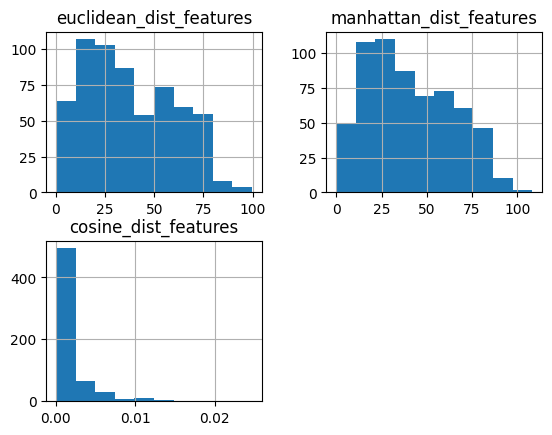

In [ ]:
rec_pool_df[dist_feature_cols].hist()

## 4. Build engine and generate recommendations

 - We will output recommended tracks based on the seed track using the following recommender engine builds

    - Build 1. Audio features only
    - Build 2. Audio features and with same predicted genre
    - Build 3. Predicted genre probabilities only
    - Build 4. Audio features and predicted genre probabilities

##### 4.1. Build 1 - Use audio features only
4.1.1. Euclidean distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','euclidean_dist_features','predicted_genre']]

,track_id,track_name,artist_name,euclidean_dist_features,predicted_genre
142,6X7eJp4lv4ZeTkWor2wHLz,Shantidope,Shanti Dope,1.564759,opm rap
300,7Livy729zY16jBsppfYLRW,Nang Iwan,This Band,1.861850,opm rock
413,2PYdoPLiEIEAwOXZNn1NaQ,Sabi Nang Sabi,ALLMO$T,2.003093,opm rap
463,6FFtbC1K2aNeCS376paoHN,Kapangyarihan - feat. SB19,Ben&Ben,2.057966,opm rock
335,4SQ3HwsAiGTikY7gOAybwH,Fall,Ben&Ben,2.147058,opm rock
576,6Rv8Ltr2MuAIM3LHF4L8qs,Rapstar,Flow G,2.205057,opm rap
38,6c1MgHPPSxYnBCA2PbJEUN,Mahal Ko O Mahal Ako,KZ Tandingan,2.433328,opm senti
398,0wUSZjJVblGKntOqBSWMdo,Bawat Daan,Ebe Dancel,2.456735,opm rock
344,7EoLMCwL7LfLsLF8acLpih,Landas,Magnus Haven,2.538163,opm rock
236,0gdYUlrMgRS9HfBX37EoVf,Take That Man,IV Of Spades,2.562883,opm rock


4.1.2. Manhattan distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','manhattan_dist_features','predicted_genre']]

,track_id,track_name,artist_name,manhattan_dist_features,predicted_genre
300,7Livy729zY16jBsppfYLRW,Nang Iwan,This Band,2.316300,opm rock
335,4SQ3HwsAiGTikY7gOAybwH,Fall,Ben&Ben,2.647000,opm rock
463,6FFtbC1K2aNeCS376paoHN,Kapangyarihan - feat. SB19,Ben&Ben,3.049700,opm rock
344,7EoLMCwL7LfLsLF8acLpih,Landas,Magnus Haven,3.055202,opm rock
413,2PYdoPLiEIEAwOXZNn1NaQ,Sabi Nang Sabi,ALLMO$T,3.141700,opm rap
142,6X7eJp4lv4ZeTkWor2wHLz,Shantidope,Shanti Dope,3.167900,opm rap
576,6Rv8Ltr2MuAIM3LHF4L8qs,Rapstar,Flow G,3.270911,opm rap
398,0wUSZjJVblGKntOqBSWMdo,Bawat Daan,Ebe Dancel,3.356600,opm rock
38,6c1MgHPPSxYnBCA2PbJEUN,Mahal Ko O Mahal Ako,KZ Tandingan,3.951545,opm senti
368,1pi3VCMlGVaXvrjlVOkBPN,KLWKN,Music Hero,4.434500,opm senti


4.1.3. Cosine distance

In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
580,639Wg7NFfgbwjSwDphqgvz,Ang Pag-ibig,Rob Deniel,0.000001,opm senti
276,3vGkyQlCw8LklNip0ZUELC,Nobela,Join The Club,0.000003,opm rock
448,4wnY5k0diSG5naOgbtCOqK,Sigurado,Belle Mariano,0.000003,opm rock
187,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,0.000003,opm rock
90,4aUf4lzQ1di5JajZ4a9FuI,"Torete - From ""Love You to the Stars And Back""",Moira Dela Torre,0.000005,opm senti
272,24ngpWhBOxKJtIPnzSNX8c,Huling Sandali (Tayo Sa Huling Buwan Ng Taon O...,December Avenue,0.000005,opm rock
516,4BAuSlaEdoGkebO9QY2C6Y,Man!,Ghetto Gecko,0.000006,opm rap
398,0wUSZjJVblGKntOqBSWMdo,Bawat Daan,Ebe Dancel,0.000006,opm rock
192,0GuAFGEkbWayjhWdlYlr7K,"Closer You and I - From ""Loving in Tandem""",Michael Pangilinan,0.000006,opm senti
153,7mxm4xOU54u1ODM9fS9w2y,Torete,Moira Dela Torre,0.000006,opm senti


##### 4.2. Build 2 - Audio features and with same predicted genre

In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [rec_pool_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist_features')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_features','predicted_genre']]

<ipython-input-33-3a4dfb00342b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = rec_pool_df[rec_pool_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_id,track_name,artist_name,cosine_dist_features,predicted_genre
276,3vGkyQlCw8LklNip0ZUELC,Nobela,Join The Club,0.000003,opm rock
448,4wnY5k0diSG5naOgbtCOqK,Sigurado,Belle Mariano,0.000003,opm rock
187,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,0.000003,opm rock
272,24ngpWhBOxKJtIPnzSNX8c,Huling Sandali (Tayo Sa Huling Buwan Ng Taon O...,December Avenue,0.000005,opm rock
398,0wUSZjJVblGKntOqBSWMdo,Bawat Daan,Ebe Dancel,0.000006,opm rock
380,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,SB19,0.000006,opm rock
168,5jLEQLkEU8Sb2fG5UQcwDM,Ako Muna,Yeng Constantino,0.000007,opm rock
463,6FFtbC1K2aNeCS376paoHN,Kapangyarihan - feat. SB19,Ben&Ben,0.000007,opm rock
253,4yLc803i7qcWx4V2piWPH5,Magkunwari ('Di Man Tayo) [TODA One I Love Off...,December Avenue,0.000007,opm rock
37,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,0.000008,opm rock


##### 4.3. Build 3 - Predicted genre probabilities

In [ ]:
rec_pool_df['all_distances_proba'] = rec_pool_df.apply(lambda x: get_distances(x[genre_proba_cols],\
                                                                           seed_track_data[genre_proba_cols]), axis=1)

In [ ]:
dist_proba_cols = ['euclidean_dist_proba','manhattan_dist_proba', 'cosine_dist_proba']
rec_pool_df[dist_proba_cols] = rec_pool_df['all_distances_proba'].apply(pd.Series)
rec_pool_df.head()

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,genre_opm rock_proba,genre_opm senti_proba,all_distances_features,euclidean_dist_features,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,0.12,0.41,"[25.281287433989522, 26.9592, 0.00010318703901...",25.281287,26.959200,0.000103,"[0.6332456079595026, 1.08, 0.5007931612927172]",0.633246,1.08,0.500793
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,0.18,0.41,"[66.55512919993465, 76.36219999999999, 0.01015...",66.555129,76.362200,0.010156,"[0.5644466316668034, 0.96, 0.3951488631956762]",0.564447,0.96,0.395149
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.16,0.45,"[10.06216314765356, 15.053900000000006, 0.0012...",10.062163,15.053900,0.001225,"[0.5981638571495272, 1.0, 0.43934694258831075]",0.598164,1.00,0.439347
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,0.14,0.71,"[36.43125398665302, 46.07520465999999, 0.00440...",36.431254,46.075205,0.004403,"[0.743370701601832, 1.1, 0.5407192577897606]",0.743371,1.10,0.540719
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,0.12,0.07,"[37.00105301974526, 41.62349999999999, 0.00094...",37.001053,41.623500,0.000945,"[0.7390534486760751, 1.2999999999999998, 0.638...",0.739053,1.30,0.638679


In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_proba')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_proba','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_proba,predicted_genre
309,2tR5liucorXRwduxr0qEx6,Binalewala - Original Version,Michael Dutchi Libranda,0.000876,opm rock
354,4trnDsgZDTeX09IjfSDyPt,Sariling Multo (Sa Panaginip),IV Of Spades,0.002469,opm rock
109,6PJ2glrMHEZKqc3kqIB7Vz,Star Ng Pasko,Aiza Seguerra,0.003495,opm rock
100,2v5VIWMjZxeiG52KckiXxS,Ikaw Lamang,Silent Sanctuary,0.003723,opm rock
64,2meEAmZCXr2dud0RRYyfZt,Kaibigan Mo,Sarah Geronimo,0.003951,opm rock
21,2qqte0XT0eFFVLuNP7Qena,Paano Ba Ang Magmahal,Piolo Pascual,0.004366,opm rock
37,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,0.004614,opm rock
482,4k2QXEOnL0epRAwFWJrqJZ,Nang Dumating Ka,Bandang Lapis,0.005279,opm rock
194,0HZ3OUVrGHxttD2EuHqRm3,The Day You Said Goodnight,Hale,0.006181,opm rock
28,135ggzbjOogZ75IQ0LQi8r,Ang Huling El Bimbo,Eraserheads,0.006459,opm rock


##### 4.4. Build 4 - Audio features and predicted genre probabilities

In [ ]:
cols = feature_cols + genre_proba_cols
rec_pool_df['all_distances_all'] = rec_pool_df.apply(lambda x: get_distances(x[cols],\
                                                                           seed_track_data[cols]), axis=1)

In [ ]:
dist_all_cols = ['euclidean_dist_all','manhattan_dist_all', 'cosine_dist_all']
rec_pool_df[dist_all_cols] = rec_pool_df['all_distances_all'].apply(pd.Series)
rec_pool_df.head()

,chart_date,track_id,track_name,streams,position,release_date,album_id,artist_id,artist_name,genres,...,manhattan_dist_features,cosine_dist_features,all_distances_proba,euclidean_dist_proba,manhattan_dist_proba,cosine_dist_proba,all_distances_all,euclidean_dist_all,manhattan_dist_all,cosine_dist_all
0,2017-01-01,2IMODbij0lZ5CuAjZi0IDE,Sila,70631,25,2015-07-31,0qwujayb77utSpftsXjdP3,0jKQrxK2zHqxyOAyIMrUQt,SUD,['opm'],...,26.959200,0.000103,"[0.6332456079595026, 1.08, 0.5007931612927172]",0.633246,1.08,0.500793,"[25.289216957430728, 28.039199999999997, 0.000...",25.289217,28.039200,0.000113
1,2017-01-01,0YyM8aEdbjGfLWPn6fdcn7,Pasensya Ka Na,52955,40,2015-04-08,38jqi8VvSax4miNL2cacD1,4nGp682WMiKS4X217kPw8C,Silent Sanctuary,['opm'],...,76.362200,0.010156,"[0.5644466316668034, 0.96, 0.3951488631956762]",0.564447,0.96,0.395149,"[66.55752266137911, 77.3222, 0.010168474329499...",66.557523,77.322200,0.010168
2,2017-01-01,6NFKf8vBApSvtzkapYmnVR,Tadhana,48330,46,2012-12-07,4SjshYHT8OeSHB6zun2Hxx,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,15.053900,0.001225,"[0.5981638571495272, 1.0, 0.43934694258831075]",0.598164,1.00,0.439347,"[10.079926944676052, 16.053900000000006, 0.001...",10.079927,16.053900,0.001232
3,2017-01-01,6M21eWbEw74XDdoQsNIinq,Malaya (Camp Sawi Original Motion Picture Soun...,39075,50,2017-09-18,52xu8EP3ABmpNk0LUzF3ih,0rZRTXEmmPmx6gt92tBqIc,Moira Dela Torre,['opm'],...,46.075205,0.004403,"[0.743370701601832, 1.1, 0.5407192577897606]",0.743371,1.10,0.540719,"[36.438837344789526, 47.17520466, 0.0044206342...",36.438837,47.175205,0.004421
4,2017-01-01,3T8yMLawoliJaN1hAGFFmv,Sigurado,34520,55,2017-01-02,5bRwSxYckOjIw3oISF6MQk,3wbCeEPAW6po7J46netxMT,Up Dharma Down,['opm'],...,41.623500,0.000945,"[0.7390534486760751, 1.2999999999999998, 0.638...",0.739053,1.30,0.638679,"[37.008433154755565, 42.9235, 0.00096085711689...",37.008433,42.923500,0.000961


In [ ]:
# get top 10 nearest to seed_track_data
# should not include seed track
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_name,artist_name,cosine_dist_all,predicted_genre
187,Kung 'Di Rin Lang Ikaw,December Avenue,0.000004,opm rock
276,Nobela,Join The Club,0.000004,opm rock
448,Sigurado,Belle Mariano,0.000005,opm rock
272,Huling Sandali (Tayo Sa Huling Buwan Ng Taon O...,December Avenue,0.000006,opm rock
398,Bawat Daan,Ebe Dancel,0.000007,opm rock
380,Hanggang Sa Huli,SB19,0.000007,opm rock
168,Ako Muna,Yeng Constantino,0.000007,opm rock
463,Kapangyarihan - feat. SB19,Ben&Ben,0.000007,opm rock
90,"Torete - From ""Love You to the Stars And Back""",Moira Dela Torre,0.000008,opm senti
37,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,0.000008,opm rock


In [ ]:
recommendation_df = rec_pool_df[rec_pool_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist_all')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_all','predicted_genre']]

,track_id,track_name,artist_name,cosine_dist_all,predicted_genre
187,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,0.000004,opm rock
276,3vGkyQlCw8LklNip0ZUELC,Nobela,Join The Club,0.000004,opm rock
448,4wnY5k0diSG5naOgbtCOqK,Sigurado,Belle Mariano,0.000005,opm rock
272,24ngpWhBOxKJtIPnzSNX8c,Huling Sandali (Tayo Sa Huling Buwan Ng Taon O...,December Avenue,0.000006,opm rock
398,0wUSZjJVblGKntOqBSWMdo,Bawat Daan,Ebe Dancel,0.000007,opm rock
380,2WUhR1SraSy0SVIQKohJb6,Hanggang Sa Huli,SB19,0.000007,opm rock
168,5jLEQLkEU8Sb2fG5UQcwDM,Ako Muna,Yeng Constantino,0.000007,opm rock
463,6FFtbC1K2aNeCS376paoHN,Kapangyarihan - feat. SB19,Ben&Ben,0.000007,opm rock
90,4aUf4lzQ1di5JajZ4a9FuI,"Torete - From ""Love You to the Stars And Back""",Moira Dela Torre,0.000008,opm senti
37,1qoXYfWILyuN0EatImGlma,"Nothing's Gonna Stop Us Now - From ""Crazy Beau...",Morissette,0.000008,opm rock


## 5. Output recommendations
Pick an approach, get the track_id list, and plug in next notebook to deploy as a playlist in Spotify

In [ ]:
recommendation_df['track_id'].values

array(['2BgD4nRyx9EZ5o8YEnjRSV', '3vGkyQlCw8LklNip0ZUELC',
       '4wnY5k0diSG5naOgbtCOqK', '24ngpWhBOxKJtIPnzSNX8c',
       '0wUSZjJVblGKntOqBSWMdo', '2WUhR1SraSy0SVIQKohJb6',
       '5jLEQLkEU8Sb2fG5UQcwDM', '6FFtbC1K2aNeCS376paoHN',
       '4aUf4lzQ1di5JajZ4a9FuI', '1qoXYfWILyuN0EatImGlma'], dtype=object)